In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ShahalAhammedK/IPL-AUCTION-PRICE-PREDICTIO-USING-ML-


Cloning into 'IPL-AUCTION-PRICE-PREDICTIO-USING-ML-'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/IPL_AUCTION_PROJECT.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df=df.drop(589)

In [ ]:
df.fillna(0,inplace=True)

**Encoding Labels into Categorical**

In [ ]:
df['Current Form']=df['Current Form'].replace('EXCELLENT', 4)
df['Current Form']=df['Current Form'].replace('GOOD', 3)
df['Current Form']=df['Current Form'].replace('AVERAGE', 2)
df['Current Form']=df['Current Form'].replace('BELOW AVERAGE', 1)
df['captain']=df['captain'].replace('yes', 1)
df['captain']=df['captain'].replace('No', 0)
df['C/U/A']=df['C/U/A'].replace('Capped', 1)
df['C/U/A']=df['C/U/A'].replace('Uncapped', 0)

In [ ]:
df['captain']=df['captain'].astype('category')
df['captain']=df['captain'].cat.codes
df['Current Form']=df['Current Form'].astype('category')
df['Current Form']=df['Current Form'].cat.codes
df['C/U/A']=df['C/U/A'].astype('category')
df['C/U/A']=df['C/U/A'].cat.codes


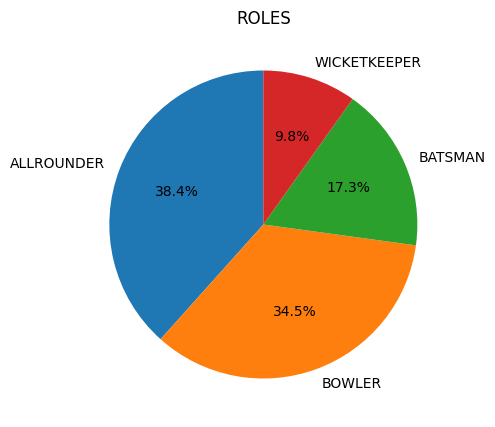

In [ ]:
import matplotlib.pyplot as plt


feature1_counts = df['ROLE'].value_counts()

labels_feature1 = feature1_counts.index
counts_feature1 = feature1_counts.values

plt.figure(figsize=(5, 5))

plt.pie(counts_feature1, labels=labels_feature1, autopct='%1.1f%%', startangle=90)
plt.title('ROLES')



plt.show()


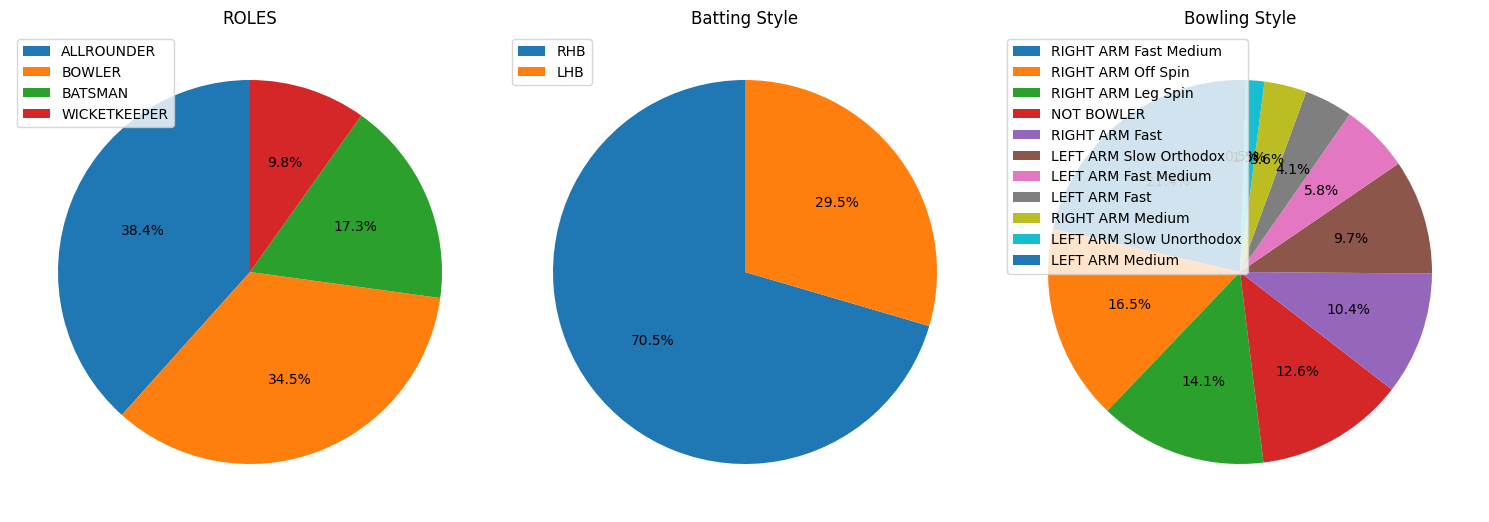

In [ ]:
import matplotlib.pyplot as plt

# Your data and code here...

import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with two columns 'feature1' and 'feature2'
# Replace 'feature1' and 'feature2' with the actual column names you want to plot

# Count the occurrences of each category in the 'feature1' and 'feature2' columns
feature1_counts = df['ROLE'].value_counts()
feature2_counts = df['BATTING'].value_counts()
feature3_counts = df['BOWLING'].value_counts()

# Get the labels (categories) and their corresponding counts for both features
labels_feature1 = feature1_counts.index
counts_feature1 = feature1_counts.values

labels_feature2 = feature2_counts.index
counts_feature2 = feature2_counts.values

labels_feature3 = feature3_counts.index
counts_feature3 = feature3_counts.values


plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.pie(counts_feature1, autopct='%1.1f%%', startangle=90)
plt.title('ROLES')
plt.legend(labels_feature1, loc='upper left')  # Adding legend for the first chart

plt.subplot(1, 3, 2)
plt.pie(counts_feature2,  autopct='%1.1f%%', startangle=90)
plt.title('Batting Style')
plt.legend(labels_feature2, loc='upper left')  # Adding legend for the second chart

plt.subplot(1, 3, 3)
plt.pie(counts_feature3,  autopct='%1.1f%%', startangle=90)
plt.title('Bowling Style')
plt.legend(labels_feature3, loc='upper left')  # Adding legend for the third chart

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**Separating Dataframe based on ROLE**

In [ ]:
BOWLER=df[df['ROLE']=='BOWLER']

In [ ]:
BATTER=df[df['ROLE']=='BATSMAN']

In [ ]:
WICKETKEEPER=df[df['ROLE']=='WICKETKEEPER']

In [ ]:
ALLROUNDER=df[df['ROLE']=='ALLROUNDER']

**Normalizing each Dataframe(0-1)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms=MinMaxScaler()


In [ ]:
X=BOWLER[['C/U/A','Test caps', 'ODI caps', 'T20 caps', 'IPL','T20I wickets','T20I Bowl avg', 'T20I Economy', 'T20I Bowl Strike rate','IPL wickets',
       'IPL Bowl avg', 'IPL Bowl Economy', 'IPL Bowl Strike rate','Last IPL wickets', 'Last IPL Bowl avg','Last IPL Economy', 'Last IPL Bowl Strike rate','T20 MATCHES','T20 WIKCKETS', 'T20 BOWL AVG', 'T20 ECONOMY', 'T20 BOWL STRIKE RATE','captain', 'Current Form', 'popularity(%)', 'Base Price (Rs Lakh)']]
col=X.columns

In [ ]:
X=ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[col])

In [ ]:
X1=X[['T20I Bowl avg', 'T20I Economy', 'T20I Bowl Strike rate','IPL Bowl avg', 'IPL Bowl Economy', 'IPL Bowl Strike rate','Last IPL Bowl avg','Last IPL Economy', 'Last IPL Bowl Strike rate','T20 BOWL AVG', 'T20 ECONOMY', 'T20 BOWL STRIKE RATE']]
cols=X1.columns


In [ ]:
X1[cols]=1-X1[cols]
X1
X1=X1.replace(1.0,0)

<ipython-input-385-369818912fc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[cols]=1-X1[cols]


In [ ]:
X2=X[['C/U/A','Test caps', 'ODI caps', 'T20 caps', 'IPL','T20I wickets','IPL wickets',
       'Last IPL wickets','T20 MATCHES','T20 WIKCKETS', 'captain', 'Current Form', 'popularity(%)', 'Base Price (Rs Lakh)']]
X2['Current Form']=X2['Current Form'].replace(0.0,0.15)

<ipython-input-386-e6cce9bd0d1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Current Form']=X2['Current Form'].replace(0.0,0.15)


In [ ]:
Z=pd.concat([X1,X2],axis=1)

In [ ]:
Z.columns

MultiIndex([(            'T20I Bowl avg',),
            (             'T20I Economy',),
            (    'T20I Bowl Strike rate',),
            (             'IPL Bowl avg',),
            (         'IPL Bowl Economy',),
            (     'IPL Bowl Strike rate',),
            (        'Last IPL Bowl avg',),
            (         'Last IPL Economy',),
            ('Last IPL Bowl Strike rate',),
            (             'T20 BOWL AVG',),
            (              'T20 ECONOMY',),
            (     'T20 BOWL STRIKE RATE',),
            (                    'C/U/A',),
            (                'Test caps',),
            (                 'ODI caps',),
            (                 'T20 caps',),
            (                      'IPL',),
            (             'T20I wickets',),
            (              'IPL wickets',),
            (         'Last IPL wickets',),
            (              'T20 MATCHES',),
            (             'T20 WIKCKETS',),
            (                  '

In [ ]:
col=Z.columns

In [ ]:
import numpy as np

**Calculating Rating Based on player ability**

In [ ]:
C1=np.asarray(Z['Last IPL Bowl avg'])
C2=np.asarray(Z['Last IPL Economy'])
C3=np.asarray(Z['Last IPL wickets'])
C4=np.asarray(Z['Last IPL Bowl Strike rate'])
A1=np.asarray(Z['IPL Bowl Economy'])
A2=np.asarray(Z['IPL wickets'])
A3=np.asarray(Z['IPL Bowl avg'])
A4=np.asarray(Z['IPL Bowl Strike rate'])
A5=np.asarray(Z[ 'IPL'])
B1=np.asarray(Z['T20I Bowl avg'])
B2=np.asarray(Z['T20I Economy'])
B3=np.asarray(Z['T20I Bowl Strike rate'])
B4=np.asarray(Z['T20I wickets'])
D1=np.asarray(Z['T20 BOWL AVG'])
D2=np.asarray(Z['T20 ECONOMY'])
D3=np.asarray(Z['T20 BOWL STRIKE RATE'])
D4=np.asarray(Z['T20 MATCHES'])
D5=np.asarray(Z['T20 WIKCKETS'])
E1=np.asarray(Z['Test caps'])
E2=np.asarray(Z['ODI caps'])
E3=np.asarray(Z['T20 caps'])
G=np.asarray(Z['Current Form'])
H=np.asarray(Z['popularity(%)'])
I=np.asarray(Z['captain'])

In [ ]:
C=(((C1+C2+C3+C4)/4)*100)*0.25+(((A1+A2+A3+A4+A5)/5)*100)*0.25+(((B1+B2+B3+B4)/4)*100)*.1+(((D1+D2+D3+D4+D5)/5)*100)*0.1+(((E1+E2+E3)/3)*100)*0.1+(G+100)*0.1+(H*100)*0.05+(I*100)*0.05

In [ ]:
BOWLER['Rating']=C

<ipython-input-393-0b5eec9be83e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BOWLER['Rating']=C


In [ ]:
X=BATTER[['C/U/A','Test caps', 'ODI caps', 'T20 caps', 'IPL','T20I Runs', 'T20I HS',
       'T20I Bat avg', 'T20I Bat Strike rate','IPL Runs',
       'IPL HS', 'IPL Bat avg', 'IPLStrike rate','Last IPL Runs', 'Last IPL HS', 'Last IPL Bat avg',
       'Last IPLStrike rate', 'T20 MATCHES',
       'T20 RUNS', 'T20 HS', 'T20 BAT AVG', 'T20 BAT STRIKE RATE','captain', 'Current Form', 'popularity(%)', 'Base Price (Rs Lakh)']]
col=X.columns

In [ ]:
X=ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[col])

In [ ]:
C1=np.asarray(X['Last IPL Runs'])
C2=np.asarray(X['Last IPL HS'])
C3=np.asarray(X['Last IPL Bat avg'])
C4=np.asarray(X['Last IPLStrike rate'])
A1=np.asarray(X['IPLStrike rate'])
A2=np.asarray(X['IPL Runs'])
A3=np.asarray(X['IPL HS'])
A4=np.asarray(X[ 'IPL Bat avg'])
A5=np.asarray(X[ 'IPL'])
B1=np.asarray(X['T20I Runs'])
B2=np.asarray(X['T20I HS'])
B3=np.asarray(X['T20I Bat avg'])
B4=np.asarray(X['T20I Bat Strike rate'])
D1=np.asarray(X['T20 RUNS'])
D2=np.asarray(X['T20 HS'])
D3=np.asarray(X['T20 BAT AVG'])
D4=np.asarray(X['T20 MATCHES'])
D5=np.asarray(X['T20 BAT STRIKE RATE'])
E1=np.asarray(X['Test caps'])
E2=np.asarray(X['ODI caps'])
E3=np.asarray(X['T20 caps'])
G=np.asarray(X['Current Form'])
H=np.asarray(X['popularity(%)'])
I=np.asarray(X['captain'])

In [ ]:
C=(((C1+C2+C3+C4)/4)*100)*0.25+(((A1+A2+A3+A4+A5)/5)*100)*0.25+(((B1+B2+B3+B4)/4)*100)*.1+(((D1+D2+D3+D4+D5)/5)*100)*0.1+(((E1+E2+E3)/3)*100)*0.1+(G+100)*0.1+(H*100)*0.05+(I*100)*0.05

In [ ]:
BATTER['Rating']=C

<ipython-input-399-27c143bd357c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BATTER['Rating']=C


In [ ]:
X=WICKETKEEPER[['C/U/A','Test caps', 'ODI caps', 'T20 caps', 'IPL','T20I Runs', 'T20I HS',
       'T20I Bat avg', 'T20I Bat Strike rate','IPL Runs',
       'IPL HS', 'IPL Bat avg', 'IPLStrike rate','Last IPL Runs', 'Last IPL HS', 'Last IPL Bat avg',
       'Last IPLStrike rate', 'T20 MATCHES',
       'T20 RUNS', 'T20 HS', 'T20 BAT AVG', 'T20 BAT STRIKE RATE','captain', 'Current Form', 'popularity(%)', 'Base Price (Rs Lakh)']]
col=X.columns

In [ ]:
X=ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[col])

In [ ]:
C1=np.asarray(X['Last IPL Runs'])
C2=np.asarray(X['Last IPL HS'])
C3=np.asarray(X['Last IPL Bat avg'])
C4=np.asarray(X['Last IPLStrike rate'])
A1=np.asarray(X['IPLStrike rate'])
A2=np.asarray(X['IPL Runs'])
A3=np.asarray(X['IPL HS'])
A4=np.asarray(X[ 'IPL Bat avg'])
A5=np.asarray(X[ 'IPL'])
B1=np.asarray(X['T20I Runs'])
B2=np.asarray(X['T20I HS'])
B3=np.asarray(X['T20I Bat avg'])
B4=np.asarray(X['T20I Bat Strike rate'])
D1=np.asarray(X['T20 RUNS'])
D2=np.asarray(X['T20 HS'])
D3=np.asarray(X['T20 BAT AVG'])
D4=np.asarray(X['T20 MATCHES'])
D5=np.asarray(X['T20 BAT STRIKE RATE'])
E1=np.asarray(X['Test caps'])
E2=np.asarray(X['ODI caps'])
E3=np.asarray(X['T20 caps'])
G=np.asarray(X['Current Form'])
H=np.asarray(X['popularity(%)'])
I=np.asarray(X['captain'])

In [ ]:
C=(((C1+C2+C3+C4)/4)*100)*0.25+(((A1+A2+A3+A4+A5)/5)*100)*0.25+(((B1+B2+B3+B4)/4)*100)*.1+(((D1+D2+D3+D4+D5)/5)*100)*0.1+(((E1+E2+E3)/3)*100)*0.1+(G+100)*0.1+(H*100)*0.05+(I*100)*0.05

In [ ]:
WICKETKEEPER['Rating']=C

<ipython-input-405-36df7728fd5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WICKETKEEPER['Rating']=C


In [ ]:
ALLROUNDER.columns

Index(['No', 'Name', 'SLOT', 'Age', 'ROLE', 'BATTING', 'BOWLING', 'C/U/A',
       'Test caps', 'ODI caps', 'T20 caps', 'IPL', 'T20I Runs', 'T20I HS',
       'T20I Bat avg', 'T20I Bat Strike rate', 'T20I wickets', 'T20I BBI',
       'T20I Bowl avg', 'T20I Economy', 'T20I Bowl Strike rate', 'IPL Runs',
       'IPL HS', 'IPL Bat avg', 'IPLStrike rate', 'IPL wickets', 'IPL BBI',
       'IPL Bowl avg', 'IPL Bowl Economy', 'IPL Bowl Strike rate',
       'Last IPL Runs', 'Last IPL HS', 'Last IPL Bat avg',
       'Last IPLStrike rate', 'Last IPL wickets', 'Last IPL Bowl avg',
       'Last IPL Economy', 'Last IPL Bowl Strike rate', 'T20 MATCHES',
       'T20 RUNS', 'T20 HS', 'T20 BAT AVG', 'T20 BAT STRIKE RATE',
       'T20 WIKCKETS', 'T20 BOWL AVG', 'T20 ECONOMY', 'T20 BOWL STRIKE RATE',
       'captain', 'Current Form', 'popularity(%)', 'Base Price (Rs Lakh)',
       'Previous Sold Price(Rs Lakh)'],
      dtype='object')

In [ ]:
X=ALLROUNDER[['C/U/A',
       'Test caps', 'ODI caps', 'T20 caps', 'IPL', 'T20I Runs', 'T20I HS',
       'T20I Bat avg', 'T20I Bat Strike rate', 'T20I wickets',
       'T20I Bowl avg', 'T20I Economy', 'T20I Bowl Strike rate', 'IPL Runs',
       'IPL HS', 'IPL Bat avg', 'IPLStrike rate', 'IPL wickets',
       'IPL Bowl avg', 'IPL Bowl Economy', 'IPL Bowl Strike rate',
       'Last IPL Runs', 'Last IPL HS', 'Last IPL Bat avg',
       'Last IPLStrike rate', 'Last IPL wickets', 'Last IPL Bowl avg',
       'Last IPL Economy', 'Last IPL Bowl Strike rate', 'T20 MATCHES',
       'T20 RUNS', 'T20 HS', 'T20 BAT AVG', 'T20 BAT STRIKE RATE',
       'T20 WIKCKETS', 'T20 BOWL AVG', 'T20 ECONOMY', 'T20 BOWL STRIKE RATE',
       'captain', 'Current Form', 'popularity(%)']]
col=X.columns

In [ ]:
X=ms.fit_transform(X)

In [ ]:

X = pd.DataFrame(X, columns=[col])

In [ ]:
X1=X[['T20I Bowl avg', 'T20I Economy', 'T20I Bowl Strike rate','IPL Bowl avg', 'IPL Bowl Economy', 'IPL Bowl Strike rate','Last IPL Bowl avg','Last IPL Economy', 'Last IPL Bowl Strike rate','T20 BOWL AVG', 'T20 ECONOMY', 'T20 BOWL STRIKE RATE']]
cols=X1.columns


In [ ]:
X1[cols]=1-X1[cols]
X1
X1=X1.replace(1.0,0)

<ipython-input-411-369818912fc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[cols]=1-X1[cols]


In [ ]:
X2=X[['C/U/A','Test caps', 'ODI caps', 'T20 caps', 'IPL', 'T20I Runs', 'T20I HS',
       'T20I Bat avg', 'T20I Bat Strike rate', 'T20I wickets','IPL Runs',
       'IPL HS', 'IPL Bat avg', 'IPLStrike rate', 'IPL wickets',
       'Last IPL Runs', 'Last IPL HS', 'Last IPL Bat avg',
       'Last IPLStrike rate', 'Last IPL wickets', 'T20 MATCHES',
       'T20 RUNS', 'T20 HS', 'T20 BAT AVG', 'T20 BAT STRIKE RATE',
       'T20 WIKCKETS', 'captain', 'Current Form', 'popularity(%)']]
X2['Current Form']=X2['Current Form'].replace(0.0,0.15)

<ipython-input-412-6e479b1f066f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Current Form']=X2['Current Form'].replace(0.0,0.15)


In [ ]:
Z=pd.concat([X1,X2],axis=1)

In [ ]:
C1=np.asarray(Z['Last IPL Bowl avg'])
C2=np.asarray(Z['Last IPL Economy'])
C3=np.asarray(Z['Last IPL wickets'])
C4=np.asarray(Z['Last IPL Bowl Strike rate'])
A1=np.asarray(Z['IPL Bowl Economy'])
A2=np.asarray(Z['IPL wickets'])
A3=np.asarray(Z['IPL Bowl avg'])
A4=np.asarray(Z['IPL Bowl Strike rate'])
A5=np.asarray(Z[ 'IPL'])
B1=np.asarray(Z['T20I Bowl avg'])
B2=np.asarray(Z['T20I Economy'])
B3=np.asarray(Z['T20I Bowl Strike rate'])
B4=np.asarray(Z['T20I wickets'])
D1=np.asarray(Z['T20 BOWL AVG'])
D2=np.asarray(Z['T20 ECONOMY'])
D3=np.asarray(Z['T20 BOWL STRIKE RATE'])
D4=np.asarray(Z['T20 MATCHES'])
D5=np.asarray(Z['T20 WIKCKETS'])
E1=np.asarray(Z['Test caps'])
E2=np.asarray(Z['ODI caps'])
E3=np.asarray(Z['T20 caps'])
G=np.asarray(Z['Current Form'])
H=np.asarray(Z['popularity(%)'])
I=np.asarray(Z['captain'])

C5=np.asarray(Z['Last IPL Runs'])
C6=np.asarray(Z['Last IPL HS'])
C7=np.asarray(Z['Last IPL Bat avg'])
C8=np.asarray(Z['Last IPLStrike rate'])
A6=np.asarray(Z['IPLStrike rate'])
A7=np.asarray(Z['IPL Runs'])
A8=np.asarray(Z['IPL HS'])
A9=np.asarray(Z[ 'IPL Bat avg'])
B5=np.asarray(Z['T20I Runs'])
B6=np.asarray(Z['T20I HS'])
B7=np.asarray(Z['T20I Bat avg'])
B8=np.asarray(Z['T20I Bat Strike rate'])
D6=np.asarray(Z['T20 RUNS'])
D7=np.asarray(Z['T20 HS'])
D8=np.asarray(Z['T20 BAT AVG'])
D9=np.asarray(Z['T20 BAT STRIKE RATE'])


In [ ]:
C=(((C1+C2+C3+C4+C5+C6+C7+C8)/8)*100)*0.25+(((A1+A2+A3+A4+A5+A6+A7+A8+A9)/9)*100)*0.25+(((B1+B2+B3+B4+B5+B6+B7+B8)/8)*100)*.1+(((D1+D2+D3+D4+D5+D6+D7+D8+D9)/9)*100)*0.1+(((E1+E2+E3)/3)*100)*0.1+(G+100)*0.1+(H*100)*0.05+(I*100)*0.05

In [ ]:
C

array([[60.35236897],
       [52.48156313],
       [55.6881848 ],
       [72.91184559],
       [29.75632458],
       [51.80917109],
       [38.56652158],
       [54.14444402],
       [47.08856342],
       [47.94411194],
       [46.16192562],
       [39.95607372],
       [37.76610505],
       [32.45532878],
       [41.44934161],
       [23.42623581],
       [28.19921753],
       [36.71400732],
       [23.5150319 ],
       [32.99610516],
       [41.34083563],
       [39.911152  ],
       [18.317699  ],
       [41.48690147],
       [32.9122796 ],
       [22.31628771],
       [46.22335122],
       [30.58625751],
       [40.32263611],
       [43.5080077 ],
       [19.50914431],
       [31.33709902],
       [15.32159265],
       [18.12986337],
       [13.92671419],
       [37.63252766],
       [14.18676912],
       [14.16322567],
       [24.21207831],
       [21.62689007],
       [14.84614262],
       [37.42958129],
       [14.88666251],
       [35.51634587],
       [24.41594038],
       [34

In [ ]:
ALLROUNDER['Rating']=C

<ipython-input-417-8651b6b8171d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ALLROUNDER['Rating']=C


In [ ]:
ALLROUNDER

,No,Name,SLOT,Age,ROLE,BATTING,BOWLING,C/U/A,Test caps,ODI caps,...,T20 WIKCKETS,T20 BOWL AVG,T20 ECONOMY,T20 BOWL STRIKE RATE,captain,Current Form,popularity(%),Base Price (Rs Lakh),Previous Sold Price(Rs Lakh),Rating
0,1.0,R Ashwin,INDIAN,35.0,ALLROUNDER,RHB,RIGHT ARM Off Spin,1,84.0,112.0,...,287.0,25.87,6.97,22.2,1,2,90,200.0,760.0,60.352369
2,3.0,Pat Cummins,FOREIGNER,28.0,ALLROUNDER,RHB,RIGHT ARM Fast,1,38.0,69.0,...,143.0,26.67,7.98,20.0,0,1,82,200.0,1550.0,52.481563
18,19.0,Shakib Al Hasan,FOREIGNER,35.0,ALLROUNDER,LHB,LEFT ARM Slow Orthodox,1,59.0,215.0,...,437.0,21.42,6.81,18.8,1,2,83,200.0,200.0,55.688185
19,20.0,Dwayne Bravo,FOREIGNER,38.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,1,40.0,164.0,...,614.0,24.13,8.23,17.5,1,1,88,200.0,640.0,72.911846
20,21.0,Wanindu Hasaranga,FOREIGNER,24.0,ALLROUNDER,RHB,RIGHT ARM Leg Spin,1,4.0,29.0,...,186.0,1.74,6.74,14.8,0,2,75,100.0,100.0,29.756325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,585.0,Safyaan Sharif,FOREIGNER,30.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,89.0,23.74,7.85,18.1,0,1,20,20.0,20.0,13.376121
585,586.0,Henry Shipley,FOREIGNER,25.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,29.0,21.96,8.01,16.4,0,0,20,20.0,20.0,13.395062
586,587.0,Maxwell Swaminathan,INDIAN,23.0,ALLROUNDER,RHB,RIGHT ARM Off Spin,0,0.0,0.0,...,0.0,0.00,0.00,0.0,0,3,20,20.0,20.0,10.100000
587,588.0,Johan Van Dyk,FOREIGNER,28.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,10.0,18.60,6.88,16.2,0,2,20,20.0,20.0,13.056179


**Concatinating all Dataframe into One data frame**

In [ ]:
NEW=pd.concat([BOWLER[['No','Rating']],BATTER[['No','Rating']],ALLROUNDER[['No','Rating']],WICKETKEEPER[['No','Rating']]])

In [ ]:
NEW=NEW.sort_values(by=['No'])

In [ ]:
df['Rating']=NEW['Rating']

In [ ]:
df.columns

Index(['No', 'Name', 'SLOT', 'Age', 'ROLE', 'BATTING', 'BOWLING', 'C/U/A',
       'Test caps', 'ODI caps', 'T20 caps', 'IPL', 'T20I Runs', 'T20I HS',
       'T20I Bat avg', 'T20I Bat Strike rate', 'T20I wickets', 'T20I BBI',
       'T20I Bowl avg', 'T20I Economy', 'T20I Bowl Strike rate', 'IPL Runs',
       'IPL HS', 'IPL Bat avg', 'IPLStrike rate', 'IPL wickets', 'IPL BBI',
       'IPL Bowl avg', 'IPL Bowl Economy', 'IPL Bowl Strike rate',
       'Last IPL Runs', 'Last IPL HS', 'Last IPL Bat avg',
       'Last IPLStrike rate', 'Last IPL wickets', 'Last IPL Bowl avg',
       'Last IPL Economy', 'Last IPL Bowl Strike rate', 'T20 MATCHES',
       'T20 RUNS', 'T20 HS', 'T20 BAT AVG', 'T20 BAT STRIKE RATE',
       'T20 WIKCKETS', 'T20 BOWL AVG', 'T20 ECONOMY', 'T20 BOWL STRIKE RATE',
       'captain', 'Current Form', 'popularity(%)', 'Base Price (Rs Lakh)',
       'Previous Sold Price(Rs Lakh)', 'Rating'],
      dtype='object')

**Clustering Main Dataframe**

In [ ]:
K8=df[['C/U/A','Test caps', 'ODI caps', 'T20 caps', 'IPL', 'T20I Runs', 'T20I HS',
       'T20I Bat avg', 'T20I Bat Strike rate', 'T20I wickets','IPL Runs',
       'IPL HS', 'IPL Bat avg', 'IPLStrike rate', 'IPL wickets',
       'Last IPL Runs', 'Last IPL HS', 'Last IPL Bat avg',
       'Last IPLStrike rate', 'Last IPL wickets', 'T20 MATCHES',
       'T20 RUNS', 'T20 HS', 'T20 BAT AVG', 'T20 BAT STRIKE RATE',
       'T20 WIKCKETS', 'captain', 'Current Form', 'popularity(%)','Base Price (Rs Lakh)','Rating','T20I Bowl avg', 'T20I Economy', 'T20I Bowl Strike rate','IPL Bowl avg', 'IPL Bowl Economy', 'IPL Bowl Strike rate','Last IPL Bowl avg','Last IPL Economy', 'Last IPL Bowl Strike rate','T20 BOWL AVG', 'T20 ECONOMY', 'T20 BOWL STRIKE RATE']]

In [ ]:
col=K8.columns

In [ ]:
K8=ms.fit_transform(K8)

In [ ]:
K8 = pd.DataFrame(K8, columns=[col])

In [ ]:
X1=K8[['T20I Bowl avg', 'T20I Economy', 'T20I Bowl Strike rate','IPL Bowl avg', 'IPL Bowl Economy', 'IPL Bowl Strike rate','Last IPL Bowl avg','Last IPL Economy', 'Last IPL Bowl Strike rate','T20 BOWL AVG', 'T20 ECONOMY', 'T20 BOWL STRIKE RATE']]
cols=X1.columns
X1[cols]=1-X1[cols]
X1
X1=X1.replace(1.0,0)

<ipython-input-427-0b8932b48ec6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[cols]=1-X1[cols]


In [ ]:
X2=K8[['C/U/A','Test caps', 'ODI caps', 'T20 caps', 'IPL', 'T20I Runs', 'T20I HS',
       'T20I Bat avg', 'T20I Bat Strike rate', 'T20I wickets','IPL Runs',
       'IPL HS', 'IPL Bat avg', 'IPLStrike rate', 'IPL wickets',
       'Last IPL Runs', 'Last IPL HS', 'Last IPL Bat avg',
       'Last IPLStrike rate', 'Last IPL wickets', 'T20 MATCHES',
       'T20 RUNS', 'T20 HS', 'T20 BAT AVG', 'T20 BAT STRIKE RATE',
       'T20 WIKCKETS', 'captain', 'Current Form', 'popularity(%)']]
X2['Current Form']=X2['Current Form'].replace(0.0,0.15)
X2.fillna(0,inplace=True)

<ipython-input-428-d918b3cfc193>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Current Form']=X2['Current Form'].replace(0.0,0.15)
<ipython-input-428-d918b3cfc193>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2.fillna(0,inplace=True)


In [ ]:
X3=K8[['Base Price (Rs Lakh)','Rating']]

In [ ]:
K8=pd.concat([X1,X2,X3],axis=1)
K8

,T20I Bowl avg,T20I Economy,T20I Bowl Strike rate,IPL Bowl avg,IPL Bowl Economy,IPL Bowl Strike rate,Last IPL Bowl avg,Last IPL Economy,Last IPL Bowl Strike rate,T20 BOWL AVG,...,T20 RUNS,T20 HS,T20 BAT AVG,T20 BAT STRIKE RATE,T20 WIKCKETS,captain,Current Form,popularity(%),Base Price (Rs Lakh),Rating
0,0.681918,0.878473,0.631059,0.722308,0.751601,0.623636,0.512577,0.756250,0.469444,0.710950,...,0.091987,0.218341,0.112387,0.59760,0.467427,1.0,0.666667,1.000000,1.0,0.708517
1,0.702877,0.857193,0.707152,0.749135,0.701423,0.717576,0.678041,0.740132,0.672222,0.709944,...,0.012652,0.100437,0.076159,0.48645,0.345277,0.0,0.666667,0.857143,1.0,0.699834
2,0.688082,0.876011,0.645875,0.710288,0.707117,0.667576,0.728557,0.709539,0.752778,0.702011,...,0.060886,0.288210,0.125204,0.69160,0.232899,0.0,0.333333,0.885714,1.0,0.597766
3,0.000000,0.000000,0.000000,0.714423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.761026,0.611354,0.242110,0.68800,0.000000,1.0,1.000000,0.857143,1.0,0.757307
4,0.000000,0.000000,0.000000,0.841346,0.706406,0.818182,0.000000,0.000000,0.000000,0.000000,...,0.814620,0.462882,0.242703,0.62360,0.000000,1.0,1.000000,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.734749,...,0.019065,0.113537,0.107127,0.59645,0.144951,0.0,0.333333,0.000000,0.0,0.047506
585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.754637,...,0.026182,0.170306,0.129797,0.68345,0.047231,0.0,0.150000,0.000000,0.0,0.047773
586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,1.000000,0.000000,0.0,0.001407
587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.792179,...,0.001142,0.043668,0.048155,0.54165,0.016287,0.0,0.666667,0.000000,0.0,0.043004


In [ ]:
from sklearn.cluster import KMeans

**Clustering(K-Means)**

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(K8)
y_kmeans = kmeans.fit_predict(K8)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 6, 6, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 6, 1, 6,
       2, 6, 6, 6, 8, 6, 7, 3, 7, 7, 7, 7, 7, 3, 6, 6, 6, 6, 6, 6, 6, 6,
       1, 2, 6, 6, 2, 1, 6, 2, 6, 2, 4, 9, 4, 9, 9, 9, 9, 8, 8, 8, 6, 9,
       0, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 4, 8, 8, 8, 8, 8,
       8, 4, 8, 8, 8, 2, 4, 4, 8, 7, 0, 1, 2, 7, 3, 7, 7, 3, 1, 2, 2, 8,
       6, 1, 6, 6, 1, 8, 6, 1, 2, 6, 6, 2, 6, 2, 6, 6, 1, 6, 2, 8, 2, 2,
       2, 1, 8, 9, 9, 9, 9, 9, 9, 9, 4, 9, 0, 8, 0, 4, 9, 8, 4, 8, 4, 4,
       4, 0, 4, 4, 4, 5, 4, 3, 3, 7, 7, 7, 3, 1, 3, 3, 2, 3, 2, 6, 1, 1,
       2, 6, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 2, 2, 1, 6, 1, 2,
       6, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 9, 9, 0, 9, 9, 4, 9, 9, 9, 9, 4,
       4, 0, 4, 9, 0, 9, 4, 4, 9, 4, 9, 9, 9, 9, 0, 9, 9, 9, 4, 0, 0, 4,
       4, 4, 8, 4, 4, 4, 5, 5, 4, 4, 4, 5, 8, 4, 4, 4, 7, 3, 3, 3, 3, 3,
       1, 8, 3, 3, 3, 1, 1, 1, 6, 1, 1, 2, 2, 8, 1, 1, 2, 8, 2, 1, 6, 6,
       6, 1, 0, 9, 9, 4, 9, 4, 5, 9, 9, 9, 0, 9, 0,

In [ ]:
K8['cluster']=pd.DataFrame({'Cluster':y_kmeans})
K8=K8['cluster']
K8['Rating']=df['Rating']
K8['Base Price (Rs Lakh)']=df['Base Price (Rs Lakh)']

<ipython-input-433-d510caf78c93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  K8['Rating']=df['Rating']
<ipython-input-433-d510caf78c93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  K8['Base Price (Rs Lakh)']=df['Base Price (Rs Lakh)']


In [ ]:
K8['Name']=df['Name']
K8


<ipython-input-434-39d5872d549f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  K8['Name']=df['Name']


,cluster,Rating,Base Price (Rs Lakh),Name
0,6,60.352369,200.0,R Ashwin
1,6,59.735282,200.0,Trent Boult
2,6,52.481563,200.0,Pat Cummins
3,7,63.819706,200.0,Quinton De Kock
4,7,81.067242,200.0,Shikhar Dhawan
...,...,...,...,...
584,0,13.376121,20.0,Safyaan Sharif
585,0,13.395062,20.0,Henry Shipley
586,5,10.100000,20.0,Maxwell Swaminathan
587,4,13.056179,20.0,Johan Van Dyk


In [ ]:
df['price range']=K8['cluster']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['price range']=label.fit_transform(df['price range'])

In [ ]:
df

,No,Name,SLOT,Age,ROLE,BATTING,BOWLING,C/U/A,Test caps,ODI caps,...,T20 BOWL AVG,T20 ECONOMY,T20 BOWL STRIKE RATE,captain,Current Form,popularity(%),Base Price (Rs Lakh),Previous Sold Price(Rs Lakh),Rating,price range
0,1.0,R Ashwin,INDIAN,35.0,ALLROUNDER,RHB,RIGHT ARM Off Spin,1,84.0,112.0,...,25.87,6.97,22.2,1,2,90,200.0,760.0,60.352369,6
1,2.0,Trent Boult,FOREIGNER,32.0,BOWLER,RHB,LEFT ARM Fast Medium,1,74.0,93.0,...,25.96,8.06,19.3,0,2,80,200.0,320.0,59.735282,6
2,3.0,Pat Cummins,FOREIGNER,28.0,ALLROUNDER,RHB,RIGHT ARM Fast,1,38.0,69.0,...,26.67,7.98,20.0,0,1,82,200.0,1550.0,52.481563,6
3,4.0,Quinton De Kock,FOREIGNER,29.0,WICKETKEEPER,LHB,NOT BOWLER,1,54.0,125.0,...,0.00,0.00,0.0,1,3,80,200.0,280.0,63.819706,7
4,5.0,Shikhar Dhawan,INDIAN,36.0,BATSMAN,LHB,NOT BOWLER,1,34.0,146.0,...,0.00,0.00,0.0,1,3,90,200.0,520.0,81.067242,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,585.0,Safyaan Sharif,FOREIGNER,30.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,23.74,7.85,18.1,0,1,20,20.0,20.0,13.376121,0
585,586.0,Henry Shipley,FOREIGNER,25.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,21.96,8.01,16.4,0,0,20,20.0,20.0,13.395062,0
586,587.0,Maxwell Swaminathan,INDIAN,23.0,ALLROUNDER,RHB,RIGHT ARM Off Spin,0,0.0,0.0,...,0.00,0.00,0.0,0,3,20,20.0,20.0,10.100000,5
587,588.0,Johan Van Dyk,FOREIGNER,28.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,18.60,6.88,16.2,0,2,20,20.0,20.0,13.056179,4


**Predicting that the clustering done Correct**

In [ ]:
X=df[[ 'C/U/A','Test caps', 'ODI caps', 'T20 caps', 'IPL', 'T20I Runs', 'T20I HS',
       'T20I Bat avg', 'T20I Bat Strike rate', 'T20I wickets',
       'T20I Bowl avg', 'T20I Economy', 'T20I Bowl Strike rate', 'IPL Runs',
       'IPL HS', 'IPL Bat avg', 'IPLStrike rate', 'IPL wickets',
       'IPL Bowl avg', 'IPL Bowl Economy', 'IPL Bowl Strike rate',
       'Last IPL Runs', 'Last IPL HS', 'Last IPL Bat avg',
       'Last IPLStrike rate', 'Last IPL wickets', 'Last IPL Bowl avg',
       'Last IPL Economy', 'Last IPL Bowl Strike rate', 'T20 MATCHES',
       'T20 RUNS', 'T20 HS', 'T20 BAT AVG', 'T20 BAT STRIKE RATE',
       'T20 WIKCKETS', 'T20 BOWL AVG', 'T20 ECONOMY', 'T20 BOWL STRIKE RATE',
       'captain', 'Current Form', 'popularity(%)', 'Base Price (Rs Lakh)',
        'Rating']]
Y=df['price range']

In [ ]:
import numpy as np

In [ ]:
X=np.asarray(X)
Y=np.asarray(Y)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)
print(mean_squared_error(y_test, y_pred))

1.2702702702702702


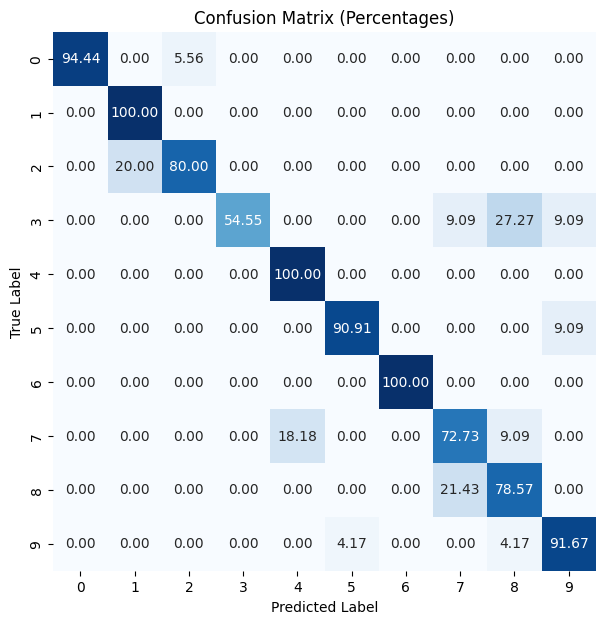

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined and trained your model and obtained the y_test and y_pred arrays.

cm = confusion_matrix(y_test, y_pred)

# Convert counts to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(7, 7))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentages)")
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy * 100:.2f}%")


88.51%


In [ ]:
df

,No,Name,SLOT,Age,ROLE,BATTING,BOWLING,C/U/A,Test caps,ODI caps,...,T20 BOWL AVG,T20 ECONOMY,T20 BOWL STRIKE RATE,captain,Current Form,popularity(%),Base Price (Rs Lakh),Previous Sold Price(Rs Lakh),Rating,price range
0,1.0,R Ashwin,INDIAN,35.0,ALLROUNDER,RHB,RIGHT ARM Off Spin,1,84.0,112.0,...,25.87,6.97,22.2,1,2,90,200.0,760.0,60.352369,6
1,2.0,Trent Boult,FOREIGNER,32.0,BOWLER,RHB,LEFT ARM Fast Medium,1,74.0,93.0,...,25.96,8.06,19.3,0,2,80,200.0,320.0,59.735282,6
2,3.0,Pat Cummins,FOREIGNER,28.0,ALLROUNDER,RHB,RIGHT ARM Fast,1,38.0,69.0,...,26.67,7.98,20.0,0,1,82,200.0,1550.0,52.481563,6
3,4.0,Quinton De Kock,FOREIGNER,29.0,WICKETKEEPER,LHB,NOT BOWLER,1,54.0,125.0,...,0.00,0.00,0.0,1,3,80,200.0,280.0,63.819706,7
4,5.0,Shikhar Dhawan,INDIAN,36.0,BATSMAN,LHB,NOT BOWLER,1,34.0,146.0,...,0.00,0.00,0.0,1,3,90,200.0,520.0,81.067242,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,585.0,Safyaan Sharif,FOREIGNER,30.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,23.74,7.85,18.1,0,1,20,20.0,20.0,13.376121,0
585,586.0,Henry Shipley,FOREIGNER,25.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,21.96,8.01,16.4,0,0,20,20.0,20.0,13.395062,0
586,587.0,Maxwell Swaminathan,INDIAN,23.0,ALLROUNDER,RHB,RIGHT ARM Off Spin,0,0.0,0.0,...,0.00,0.00,0.0,0,3,20,20.0,20.0,10.100000,5
587,588.0,Johan Van Dyk,FOREIGNER,28.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,18.60,6.88,16.2,0,2,20,20.0,20.0,13.056179,4


**Plotting predicted value and actual value**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
width = 10
height = 10

<ipython-input-448-7103589d35b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-448-7103589d35b2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , 

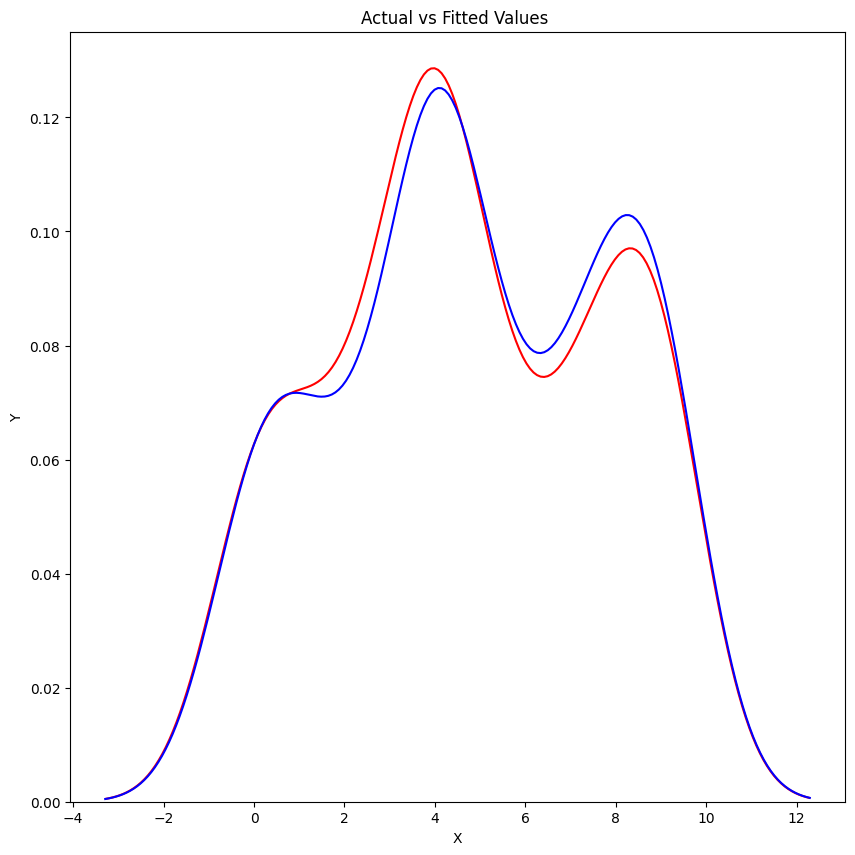

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values ')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
plt.close()

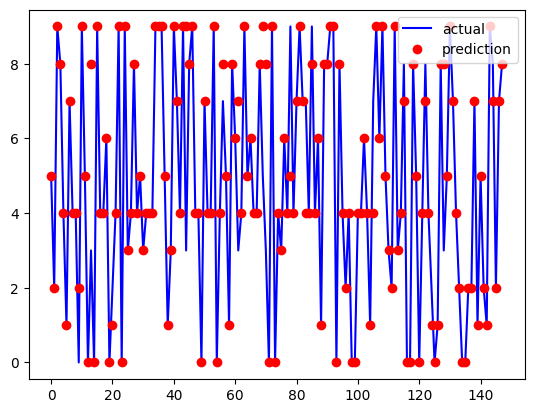

In [ ]:
plt.plot( y_test, 'b-', label = 'actual')
plt.plot( y_pred, 'ro', label = 'prediction')
plt.legend()

**Grouping DataFrame on The base of cluster**

In [ ]:
import pandas as pd


cluster_groups = K8.groupby(K8['cluster'].values.ravel())

cluster_dataframes = []
for cluster_label, group in cluster_groups:
    cluster_dataframes.append(group)

for i, cluster_df in enumerate(cluster_dataframes):
    print(f"Cluster {i+1} DataFrame:\n", cluster_df)
    print("\n")


Cluster 1 DataFrame:
     cluster     Rating Base Price (Rs Lakh)                    Name
66        0  28.199218                 40.0           Shahrukh Khan
98        0  18.297327                100.0      Marnus Labuschagne
144       0  13.926714                 30.0  Rajvardhan Hangargekar
146       0  14.186769                 20.0        Darshan Nalkande
155       0  14.531940                 20.0             Kuldeep Sen
..      ...        ...                  ...                     ...
562       0  11.214088                 20.0            Anunay Singh
564       0  13.060374                 20.0             Nyeem Young
581       0  13.276733                 20.0              Mark Deyal
584       0  13.376121                 20.0          Safyaan Sharif
585       0  13.395062                 20.0           Henry Shipley

[76 rows x 4 columns]


Cluster 2 DataFrame:
     cluster     Rating Base Price (Rs Lakh)                 Name
20        1  29.756325                100.0    Wan

**Evaluating and selecting best clusters based on rating and Base Price**

In [ ]:
cluster_groups = K8.groupby(K8['cluster'].values.ravel())

cluster_means = cluster_groups.mean()


<ipython-input-451-be35a6411639>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = cluster_groups.mean()


In [ ]:
cluster_means

,cluster,Rating,Base Price (Rs Lakh)
0,0.0,14.608712,28.421053
1,1.0,22.963482,74.907407
2,2.0,37.202775,88.617021
3,3.0,28.795325,72.222222
4,4.0,14.604351,21.176471
5,5.0,10.779360,20.000000
6,6.0,51.168042,142.209302
7,7.0,58.330401,155.833333
8,8.0,31.687965,32.692308
9,9.0,17.185609,21.264368


**Plotting of Best Clusters**

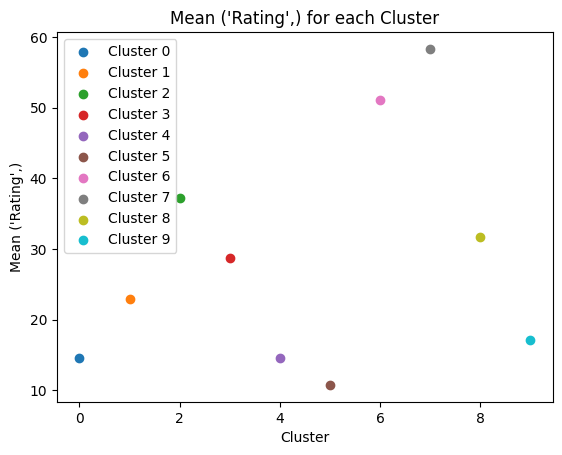

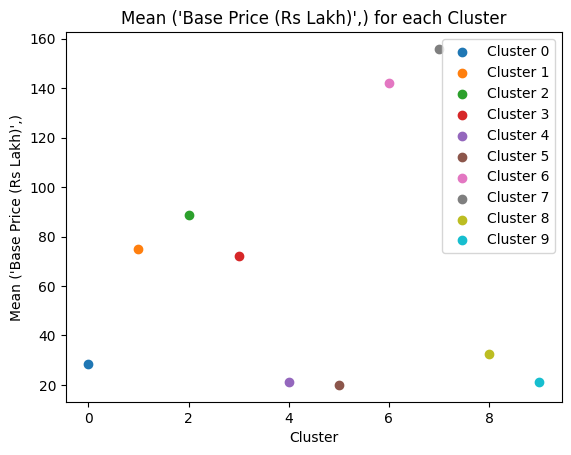

In [ ]:
import matplotlib.pyplot as plt



feature_names = cluster_means[['Rating','Base Price (Rs Lakh)']].columns


for feature in feature_names:
    plt.figure()
    for cluster_label, row in cluster_means[['Rating','Base Price (Rs Lakh)']].iterrows():
        plt.scatter(cluster_label, row[feature], label=f'Cluster {cluster_label}')
    plt.xlabel('Cluster')
    plt.ylabel('Mean ' + str(feature))
    plt.title('Mean ' + str(feature) + ' for each Cluster')
    plt.legend()
    plt.show()

**Categorizing based on evaluation**

In [ ]:
df['price range']=df['price range'].replace(7.0,'A')
df['price range']=df['price range'].replace(6.0,'B')
df['price range']=df['price range'].replace(2.0,'C')
df['price range']=df['price range'].replace(8.0,'D')
df['price range']=df['price range'].replace(3.0,'E')
df['price range']=df['price range'].replace(1.0,'F')
df['price range']=df['price range'].replace(9.0,'G')
df['price range']=df['price range'].replace(0.0,'H')
df['price range']=df['price range'].replace(4.0,'I')
df['price range']=df['price range'].replace(5.0,'J')

**Setting range for each Category**

In [ ]:
mapping = {'A': 1200, 'B': 1000, 'C': 800, 'D': 650, 'E': 500, 'F': 350, 'G': 200, 'H': 100, 'I': 50, 'J': 20}


df['Starting price'] = df.apply(lambda row: min(mapping.get(row['price range'], 0),row['Base Price (Rs Lakh)']), axis=1)


In [ ]:
mapping = {'A': 1500,'B': 1200,'C': 1000,'D': 800,'E': 650,'F': 500,'G': 350,'H': 200,'I': 100,'J': 50}


df['Maximum price'] = df['price range'].map(mapping)
df

,No,Name,SLOT,Age,ROLE,BATTING,BOWLING,C/U/A,Test caps,ODI caps,...,T20 BOWL STRIKE RATE,captain,Current Form,popularity(%),Base Price (Rs Lakh),Previous Sold Price(Rs Lakh),Rating,price range,Starting price,Maximum price
0,1.0,R Ashwin,INDIAN,35.0,ALLROUNDER,RHB,RIGHT ARM Off Spin,1,84.0,112.0,...,22.2,1,2,90,200.0,760.0,60.352369,B,200.0,1200
1,2.0,Trent Boult,FOREIGNER,32.0,BOWLER,RHB,LEFT ARM Fast Medium,1,74.0,93.0,...,19.3,0,2,80,200.0,320.0,59.735282,B,200.0,1200
2,3.0,Pat Cummins,FOREIGNER,28.0,ALLROUNDER,RHB,RIGHT ARM Fast,1,38.0,69.0,...,20.0,0,1,82,200.0,1550.0,52.481563,B,200.0,1200
3,4.0,Quinton De Kock,FOREIGNER,29.0,WICKETKEEPER,LHB,NOT BOWLER,1,54.0,125.0,...,0.0,1,3,80,200.0,280.0,63.819706,A,200.0,1500
4,5.0,Shikhar Dhawan,INDIAN,36.0,BATSMAN,LHB,NOT BOWLER,1,34.0,146.0,...,0.0,1,3,90,200.0,520.0,81.067242,A,200.0,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,585.0,Safyaan Sharif,FOREIGNER,30.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,18.1,0,1,20,20.0,20.0,13.376121,H,20.0,200
585,586.0,Henry Shipley,FOREIGNER,25.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,16.4,0,0,20,20.0,20.0,13.395062,H,20.0,200
586,587.0,Maxwell Swaminathan,INDIAN,23.0,ALLROUNDER,RHB,RIGHT ARM Off Spin,0,0.0,0.0,...,0.0,0,3,20,20.0,20.0,10.100000,J,20.0,50
587,588.0,Johan Van Dyk,FOREIGNER,28.0,ALLROUNDER,RHB,RIGHT ARM Fast Medium,0,0.0,0.0,...,16.2,0,2,20,20.0,20.0,13.056179,I,20.0,100


**New Dataframe(Performance the player in 2022)**

In [ ]:
New_df=pd.read_csv('/content/drive/MyDrive/New_data2022.csv')
New_df.columns
New_df.isnull().sum()
New_df.dropna(axis=0,inplace=True)
New_df.columns

Index(['NO', 'Player', 'SLOT', 'Age', 'ROLE', 'Matches', 'Batting Innigs',
       'Not out', 'Runs Scored', 'High score', 'Batting avg', 'Balls faced',
       'Battting Strike rate', '100 scored ', '50 scored', '4s', '6s',
       'Bowling Innigs', 'Overs Bowled', 'Runs Conceded', 'Wickets taken',
       'Bowling Average', 'Bowling Economy', 'Bowling Strike rate', '4w', '5w',
       'Base Price (Rs Lakh)', 'SOLD PRICE(Lakh)'],
      dtype='object')

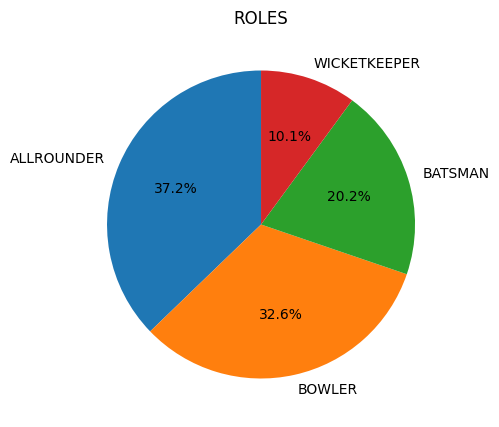

In [ ]:
import matplotlib.pyplot as plt


feature1_counts = New_df['ROLE'].value_counts()

labels_feature1 = feature1_counts.index
counts_feature1 = feature1_counts.values

plt.figure(figsize=(5, 5))

plt.pie(counts_feature1, labels=labels_feature1, autopct='%1.1f%%', startangle=90)
plt.title('ROLES')



plt.show()


**Separating Dataframe On ROLE**

In [ ]:
BOWLER=New_df[New_df['ROLE']=='BOWLER']

In [ ]:
BATTER=New_df[New_df['ROLE']=='BATSMAN']

In [ ]:
WICKETKEEPER=New_df[New_df['ROLE']=='WICKETKEEPER']

In [ ]:
ALLROUNDER=New_df[New_df['ROLE']=='ALLROUNDER']

In [ ]:
BOWLER.columns

Index(['NO', 'Player', 'SLOT', 'Age', 'ROLE', 'Matches', 'Batting Innigs',
       'Not out', 'Runs Scored', 'High score', 'Batting avg', 'Balls faced',
       'Battting Strike rate', '100 scored ', '50 scored', '4s', '6s',
       'Bowling Innigs', 'Overs Bowled', 'Runs Conceded', 'Wickets taken',
       'Bowling Average', 'Bowling Economy', 'Bowling Strike rate', '4w', '5w',
       'Base Price (Rs Lakh)', 'SOLD PRICE(Lakh)'],
      dtype='object')

**Calculating Rating On each Role(Ability)**

In [ ]:
X=BOWLER[['Matches', 'Bowling Innigs', 'Overs Bowled', 'Runs Conceded', 'Wickets taken',
       'Bowling Average', 'Bowling Economy', 'Bowling Strike rate']]
col=X.columns

In [ ]:
X=ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[col])

In [ ]:
X1=X[['Runs Conceded','Bowling Average', 'Bowling Economy', 'Bowling Strike rate']]
cols=X1.columns


In [ ]:
X1[cols]=1-X1[cols]
X1
X1=X1.replace(1.0,0)

<ipython-input-468-369818912fc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[cols]=1-X1[cols]


In [ ]:
X2=X[['Matches', 'Bowling Innigs', 'Overs Bowled', 'Wickets taken',
       ]]

In [ ]:
Z=pd.concat([X1,X2],axis=1)

In [ ]:
Z.columns

MultiIndex([(      'Runs Conceded',),
            (    'Bowling Average',),
            (    'Bowling Economy',),
            ('Bowling Strike rate',),
            (            'Matches',),
            (     'Bowling Innigs',),
            (       'Overs Bowled',),
            (      'Wickets taken',)],
           )

In [ ]:
A=np.asarray(Z['Runs Conceded'])
B=np.asarray(Z['Bowling Average'])
C=np.asarray(Z['Bowling Economy'])
D=np.asarray(Z['Bowling Strike rate'])
E=np.asarray(Z['Matches'])
F=np.asarray(Z['Bowling Innigs'])
G=np.asarray(Z['Overs Bowled'])
H=np.asarray(Z['Wickets taken'])


In [ ]:
R=((A+B+C+D+F+E+G+H)/8)*100

In [ ]:
BOWLER['Rating']=R
BOWLER

<ipython-input-474-5e72b91c9984>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BOWLER['Rating']=R


,NO,Player,SLOT,Age,ROLE,Matches,Batting Innigs,Not out,Runs Scored,High score,...,Runs Conceded,Wickets taken,Bowling Average,Bowling Economy,Bowling Strike rate,4w,5w,Base Price (Rs Lakh),SOLD PRICE(Lakh),Rating
38,39,Lalit Yadav,INDIAN,26,BOWLER,12,8,1,161,48,...,150,4,37.50,8.33,27.00,0,0,20,20,52.418239
39,40,Lalit Yadav,INDIAN,26,BOWLER,12,8,1,161,48,...,150,4,37.50,8.33,27.00,0,0,20,20,52.418239
43,44,Shardul Thakur,INDIAN,30,BOWLER,14,10,2,120,29,...,473,15,31.53,9.78,19.33,1,0,200,1075,62.038739
50,51,Rahul Chahar,INDIAN,22,BOWLER,13,8,2,77,25,...,360,14,25.71,7.71,20.00,0,0,75,240,67.673173
54,55,Jaydev Unadkat,INDIAN,30,BOWLER,5,5,2,59,19,...,190,6,31.66,9.50,20.00,0,0,75,130,45.830782
57,58,Umesh Yadav,INDIAN,34,BOWLER,12,7,3,55,21,...,339,16,21.18,7.06,18.00,1,0,200,200,70.680488
59,60,Kagiso Rabada,FOREIGNER,26,BOWLER,13,8,3,48,25,...,406,23,17.65,8.45,12.52,2,0,200,540,73.159869
60,61,Kuldeep Yadav,INDIAN,27,BOWLER,14,7,6,48,16,...,419,21,19.95,8.43,14.19,2,0,100,200,72.835258
66,67,Trent Boult,FOREIGNER,32,BOWLER,16,8,6,40,17,...,492,16,30.75,7.93,23.25,0,0,200,800,70.742916
74,75,Bhuvneshwar Kumar,INDIAN,32,BOWLER,14,6,3,24,8,...,383,12,31.91,7.34,26.08,0,0,200,420,66.769833


In [ ]:
X=BATTER[['Matches', 'Batting Innigs',
       'Not out', 'Runs Scored', 'High score', 'Batting avg', 'Balls faced',
       'Battting Strike rate', '50 scored', '4s', '6s']]
col=X.columns

In [ ]:
X=ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[col])

In [ ]:
A=np.asarray(X['Batting Innigs'])
B=np.asarray(X['Not out'])
C=np.asarray(X['Runs Scored'])
D=np.asarray(X['High score'])
E=np.asarray(X['Matches'])
F=np.asarray(X['Batting avg'])
G=np.asarray(X['Balls faced'])
H=np.asarray(X['Battting Strike rate'])
J=np.asarray(X['50 scored'])
K=np.asarray(X['4s'])
I=np.asarray(X['6s'])


In [ ]:
R=((A+B+C+D+F+E+G+H+I+J+K)/11)*100

In [ ]:
BATTER['Rating']=R

<ipython-input-480-66c019093779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BATTER['Rating']=R


In [ ]:
X=WICKETKEEPER[['Matches', 'Batting Innigs',
       'Not out', 'Runs Scored', 'High score', 'Batting avg', 'Balls faced',
       'Battting Strike rate','50 scored', '4s', '6s']]
col=X.columns

In [ ]:
X=ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[col])

In [ ]:
A=np.asarray(X['Batting Innigs'])
B=np.asarray(X['Not out'])
C=np.asarray(X['Runs Scored'])
D=np.asarray(X['High score'])
E=np.asarray(X['Matches'])
F=np.asarray(X['Batting avg'])
G=np.asarray(X['Balls faced'])
H=np.asarray(X['Battting Strike rate'])
J=np.asarray(X['50 scored'])
K=np.asarray(X['4s'])
I=np.asarray(X['6s'])


In [ ]:
R=((A+B+C+D+F+E+G+H+I+J+K)/11)*100

In [ ]:
WICKETKEEPER['Rating']=R

<ipython-input-486-c2cd3d3fb533>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WICKETKEEPER['Rating']=R


In [ ]:
ALLROUNDER

,NO,Player,SLOT,Age,ROLE,Matches,Batting Innigs,Not out,Runs Scored,High score,...,Overs Bowled,Runs Conceded,Wickets taken,Bowling Average,Bowling Economy,Bowling Strike rate,4w,5w,Base Price (Rs Lakh),SOLD PRICE(Lakh)
4,5,Deepak Hooda,INDIAN,26,ALLROUNDER,15,14,0,451,59,...,4.0,43,1,43.00,10.75,24.00,0,0,40,575
5,6,Liam Livingstone,FOREIGNER,28,ALLROUNDER,14,14,2,437,70,...,23.0,202,6,33.66,8.78,23.00,0,0,100,1150
7,8,Abhishek Sharma,INDIAN,21,ALLROUNDER,14,14,0,426,75,...,0.0,0,0,0.00,0.00,0.00,0,0,20,650
13,14,Nitish Rana,INDIAN,28,ALLROUNDER,14,14,1,361,57,...,0.0,0,0,0.00,0.00,0.00,0,0,100,800
19,20,Shivam Dube,INDIAN,28,ALLROUNDER,11,11,1,289,95,...,0.0,0,0,0.00,0.00,0.00,0,0,50,400
23,24,Mitchell Marsh,FOREIGNER,30,ALLROUNDER,8,8,0,251,89,...,12.0,102,4,25.50,8.50,18.00,0,0,200,650
27,28,Rahul Tewatia,INDIAN,28,ALLROUNDER,16,12,5,217,43,...,0.0,0,0,0.00,0.00,0.00,0,0,40,900
29,30,Tim David,FOREIGNER,26,ALLROUNDER,8,8,3,186,46,...,0.0,0,0,0.00,0.00,0.00,0,0,40,825
30,31,Riyan Parag,INDIAN,20,ALLROUNDER,17,14,3,183,56,...,4.0,59,1,59.00,14.75,24.00,0,0,30,110
31,32,Krunal Pandya,INDIAN,31,ALLROUNDER,14,13,4,183,42,...,38.0,265,10,26.50,6.97,22.80,0,0,200,825


In [ ]:
X=ALLROUNDER[[ 'Matches', 'Batting Innigs',
       'Not out', 'Runs Scored', 'High score', 'Batting avg', 'Balls faced',
       'Battting Strike rate','50 scored', '4s', '6s',
       'Bowling Innigs', 'Overs Bowled', 'Runs Conceded', 'Wickets taken',
       'Bowling Average', 'Bowling Economy', 'Bowling Strike rate',]]
col=X.columns

In [ ]:
X=ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[col])

In [ ]:
X1=X[['Runs Conceded','Bowling Average', 'Bowling Economy', 'Bowling Strike rate']]
cols=X1.columns


In [ ]:
X1[cols]=1-X1[cols]
X1
X1=X1.replace(1.0,0)

<ipython-input-492-369818912fc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[cols]=1-X1[cols]


In [ ]:
X2=X[['Matches', 'Batting Innigs',
       'Not out', 'Runs Scored', 'High score', 'Batting avg', 'Balls faced',
       'Battting Strike rate', '50 scored', '4s', '6s',
       'Bowling Innigs', 'Overs Bowled', 'Wickets taken']]

In [ ]:
Z=pd.concat([X1,X2],axis=1)

In [ ]:
A=np.asarray(X['Batting Innigs'])
B=np.asarray(X['Not out'])
C=np.asarray(X['Runs Scored'])
D=np.asarray(X['High score'])
E=np.asarray(X['Matches'])
F=np.asarray(X['Batting avg'])
G=np.asarray(X['Balls faced'])
H=np.asarray(X['Battting Strike rate'])
J=np.asarray(X['50 scored'])
K=np.asarray(X['4s'])
L=np.asarray(X['6s'])
M=np.asarray(Z['Runs Conceded'])
N=np.asarray(Z['Bowling Average'])
O=np.asarray(Z['Bowling Economy'])
P=np.asarray(Z['Bowling Strike rate'])
Q=np.asarray(Z['Bowling Innigs'])
R=np.asarray(Z['Overs Bowled'])
I=np.asarray(Z['Wickets taken'])

In [ ]:
R=((A+B+C+D+F+E+G+H+I+J+K+L+M+N+O+P+Q+R)/18)*100

In [ ]:
ALLROUNDER['Rating']=R

<ipython-input-497-0db424a2e556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ALLROUNDER['Rating']=R


**Concatinating all seprated Data frame**

In [ ]:
NEW=pd.concat([BOWLER[['NO','Rating']],BATTER[['NO','Rating']],ALLROUNDER[['NO','Rating']],WICKETKEEPER[['NO','Rating']]])

In [ ]:
NEW=NEW.sort_values(by=['NO'])

In [ ]:
New_df['Rating']=NEW['Rating']

In [ ]:
New_df

,NO,Player,SLOT,Age,ROLE,Matches,Batting Innigs,Not out,Runs Scored,High score,...,Runs Conceded,Wickets taken,Bowling Average,Bowling Economy,Bowling Strike rate,4w,5w,Base Price (Rs Lakh),SOLD PRICE(Lakh),Rating
0,1,Quinton De Kock,FOREIGNER,29,WICKETKEEPER,15,15,1,508,140,...,0,0,0.0,0.00,0.0,0,0,200,675,83.579891
1,2,David Miller,FOREIGNER,32,BATSMAN,16,16,9,481,94,...,0,0,0.0,0.00,0.0,0,0,100,300,85.165230
2,3,Faf Du Plessis,FOREIGNER,37,BATSMAN,16,16,1,468,96,...,0,0,0.0,0.00,0.0,0,0,200,700,72.248396
3,4,Shikhar Dhawan,INDIAN,36,BATSMAN,14,14,2,460,88,...,0,0,0.0,0.00,0.0,0,0,200,640,70.247955
4,5,Deepak Hooda,INDIAN,26,ALLROUNDER,15,14,0,451,59,...,43,1,43.0,10.75,24.0,0,0,40,575,59.051163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,Varun Aaron,INDIAN,32,BOWLER,0,0,0,0,0,...,52,2,26.0,10.40,15.0,0,0,50,50,38.849505
131,132,Darshan Nalkande,INDIAN,23,ALLROUNDER,0,0,0,0,0,...,59,2,29.5,11.41,15.5,0,0,20,20,15.200319
132,133,Anukul Roy,INDIAN,23,ALLROUNDER,0,0,0,0,0,...,55,1,55.0,7.85,42.0,0,0,20,20,12.366143
133,134,Mayank Markande,INDIAN,24,BOWLER,0,0,0,0,0,...,57,1,57.0,8.14,42.0,0,0,50,65,30.315465


**Clustering Dataframe**

In [ ]:
New2=New_df[['Matches', 'Batting Innigs', 'Not out', 'Runs Scored',
       'High score', 'Batting avg', 'Balls faced', 'Battting Strike rate',
       '100 scored ', '50 scored', '4s', '6s', 'Bowling Innigs',
       'Overs Bowled', 'Runs Conceded', 'Wickets taken', 'Bowling Average',
       'Bowling Economy', 'Bowling Strike rate', '4w', '5w']]

In [ ]:
X=New2
col=X.columns
col
X.dtypes

Matches                   int64
Batting Innigs            int64
Not out                   int64
Runs Scored               int64
High score                int64
Batting avg             float64
Balls faced               int64
Battting Strike rate    float64
100 scored                int64
50 scored                 int64
4s                        int64
6s                        int64
Bowling Innigs            int64
Overs Bowled            float64
Runs Conceded             int64
Wickets taken             int64
Bowling Average         float64
Bowling Economy         float64
Bowling Strike rate     float64
4w                        int64
5w                        int64
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X=ms.fit_transform(X)
X


array([[0.88235294, 0.88235294, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.94117647, 0.94117647, 0.9       , ..., 0.        , 0.        ,
        0.        ],
       [0.94117647, 0.94117647, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.63636364, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.63636364, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.63636364, 0.        ,
        0.        ]])

In [ ]:
X=pd.DataFrame(X,columns=[col])
X


,Matches,Batting Innigs,Not out,Runs Scored,High score,Batting avg,Balls faced,Battting Strike rate,100 scored,50 scored,...,6s,Bowling Innigs,Overs Bowled,Runs Conceded,Wickets taken,Bowling Average,Bowling Economy,Bowling Strike rate,4w,5w
0,0.882353,0.882353,0.1,1.000000,1.000000,0.528162,0.909333,0.567505,1.0,0.6,...,0.676471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.941176,0.941176,0.9,0.946850,0.671429,1.000000,0.898667,0.543695,0.0,0.4,...,0.676471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.941176,0.941176,0.1,0.921260,0.685714,0.454082,0.978667,0.485790,0.0,0.6,...,0.382353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.823529,0.823529,0.2,0.905512,0.628571,0.557852,1.000000,0.467276,0.0,0.6,...,0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.882353,0.823529,0.0,0.887795,0.421429,0.468782,0.880000,0.520610,0.0,0.8,...,0.529412,0.117647,0.058824,0.078040,0.037037,0.544304,0.671875,0.363636,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.117647,0.073529,0.094374,0.074074,0.329114,0.650000,0.227273,0.0,0.0
125,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.117647,0.075000,0.107078,0.074074,0.373418,0.713125,0.234848,0.0,0.0
126,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.117647,0.102941,0.099819,0.037037,0.696203,0.490625,0.636364,0.0,0.0
127,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.117647,0.102941,0.103448,0.037037,0.721519,0.508750,0.636364,0.0,0.0


In [ ]:
X['Bowling Average']=1-X['Bowling Average']
X['Bowling Average']=X['Bowling Average'].replace(1,0)
X['Bowling Economy']=1-X['Bowling Economy']
X['Bowling Economy']=X['Bowling Economy'].replace(1,0)
X['Bowling Strike rate']=1-X['Bowling Strike rate']
X['Bowling Strike rate']=X['Bowling Strike rate'].replace(1,0)

In [ ]:
from sklearn.cluster import KMeans

**K-Means**

In [ ]:
kmeans=KMeans(n_clusters=10,random_state=0)
kmeans.fit(X)
iden=kmeans.fit_predict(X)
iden

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 7, 2, 7, 7, 7, 2, 7, 7, 7, 7, 7,
       7, 4, 7, 7, 7, 7, 6, 6, 4, 4, 6, 6, 4, 4, 4, 4, 4, 4, 6, 6, 6, 5,
       6, 1, 6, 6, 6, 6, 5, 6, 6, 1, 1, 1, 5, 5, 1, 5, 5, 0, 1, 1, 5, 9,
       5, 5, 8, 1, 0, 0, 0, 0, 5, 1, 1, 0, 5, 1, 1, 0, 0, 0, 9, 0, 0, 1,
       9, 1, 9, 9, 9, 1, 1, 0, 5, 5, 0, 5, 1, 8, 9, 0, 0, 3, 1, 3, 3, 3,
       1, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 3, 3, 9, 9, 9],
      dtype=int32)

In [ ]:
New_df['cluster']=iden
New_df.columns


Index(['NO', 'Player', 'SLOT', 'Age', 'ROLE', 'Matches', 'Batting Innigs',
       'Not out', 'Runs Scored', 'High score', 'Batting avg', 'Balls faced',
       'Battting Strike rate', '100 scored ', '50 scored', '4s', '6s',
       'Bowling Innigs', 'Overs Bowled', 'Runs Conceded', 'Wickets taken',
       'Bowling Average', 'Bowling Economy', 'Bowling Strike rate', '4w', '5w',
       'Base Price (Rs Lakh)', 'SOLD PRICE(Lakh)', 'Rating', 'cluster'],
      dtype='object')

In [ ]:
New_df.columns

Index(['NO', 'Player', 'SLOT', 'Age', 'ROLE', 'Matches', 'Batting Innigs',
       'Not out', 'Runs Scored', 'High score', 'Batting avg', 'Balls faced',
       'Battting Strike rate', '100 scored ', '50 scored', '4s', '6s',
       'Bowling Innigs', 'Overs Bowled', 'Runs Conceded', 'Wickets taken',
       'Bowling Average', 'Bowling Economy', 'Bowling Strike rate', '4w', '5w',
       'Base Price (Rs Lakh)', 'SOLD PRICE(Lakh)', 'Rating', 'cluster'],
      dtype='object')

In [ ]:
X=New_df[['Matches', 'Batting Innigs', 'Not out', 'Runs Scored',
       'High score', 'Batting avg', 'Balls faced', 'Battting Strike rate',
       '100 scored ', '50 scored', '4s', '6s', 'Bowling Innigs',
       'Overs Bowled', 'Runs Conceded', 'Wickets taken', 'Bowling Average',
       'Bowling Economy', 'Bowling Strike rate', '4w', '5w']]
Y=New_df['cluster']

In [ ]:
X=np.asarray(X)
Y=np.asarray(Y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

**Prediction**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)
print(mean_squared_error(y_test, y_pred))

3.0303030303030303


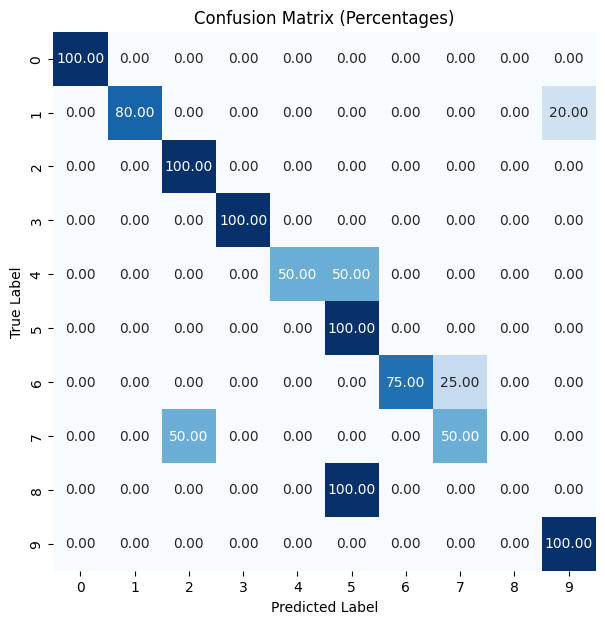

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined and trained your model and obtained the y_test and y_pred arrays.

cm = confusion_matrix(y_test, y_pred)

# Convert counts to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(7, 7))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentages)")
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy * 100:.2f}%")


84.85%


**Plotting**

<ipython-input-518-7103589d35b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-518-7103589d35b2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , 

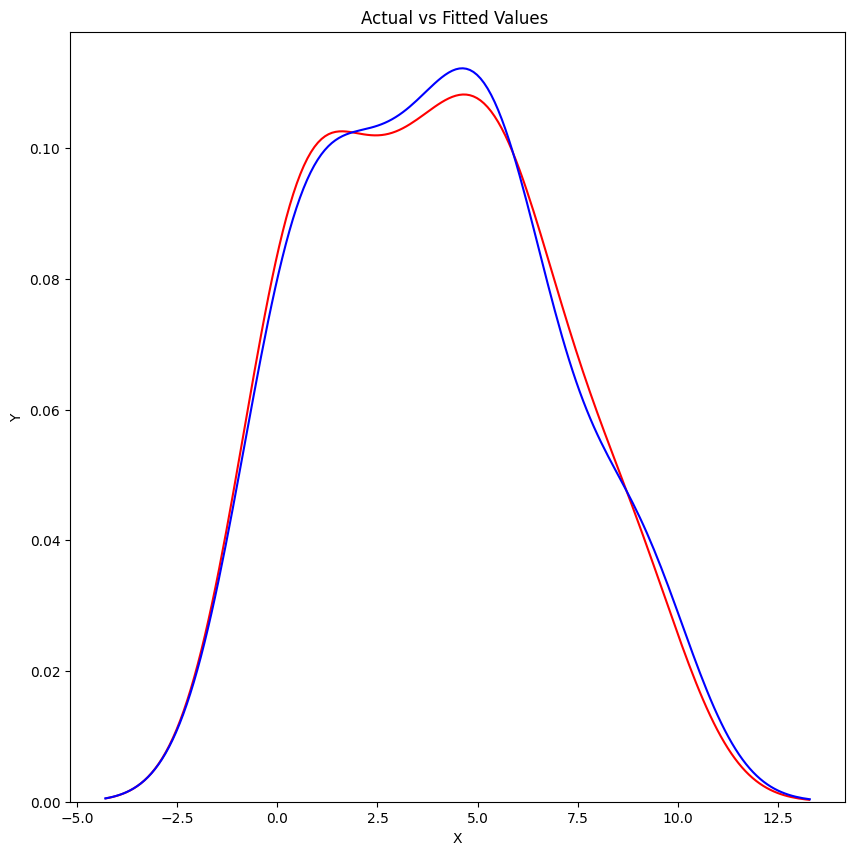

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values ')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
plt.close()

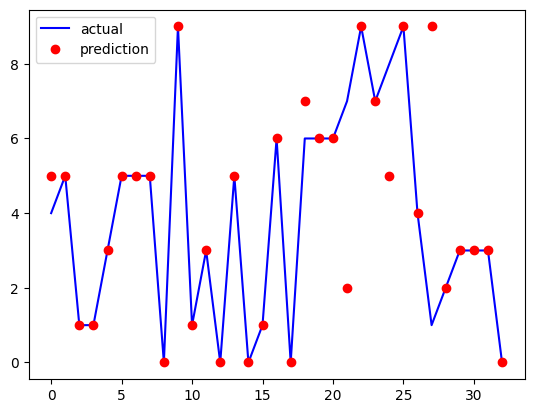

In [ ]:
plt.plot( y_test, 'b-', label = 'actual')
plt.plot( y_pred, 'ro', label = 'prediction')
plt.legend()

In [ ]:
K8=New_df[['cluster','Rating','Base Price (Rs Lakh)']]

Evaluating Clusters(categorizing On the basis Of rating)

In [ ]:
import pandas as pd


cluster_groups = K8.groupby(K8['cluster'].values.ravel())

cluster_dataframes = []
for cluster_label, group in cluster_groups:
    cluster_dataframes.append(group)

for i, cluster_df in enumerate(cluster_dataframes):
    print(f"Cluster {i+1} DataFrame:\n", cluster_df)
    print("\n")


Cluster 1 DataFrame:
      cluster     Rating  Base Price (Rs Lakh)
61         0  16.371145                    20
70         0   7.758305                    75
71         0   8.802310                   100
72         0   8.377077                   150
73         0   6.468397                    50
77         0   5.393875                    30
81         0  14.179725                    20
82         0   6.454364                    50
83         0   6.998751                    50
86         0   6.380650                    50
87         0   5.823585                    20
97         0   6.817973                    20
100        0   5.520231                    20
106        0   3.906131                    20
107        0   0.000000                    20


Cluster 2 DataFrame:
      cluster     Rating  Base Price (Rs Lakh)
45         1  34.550952                   150
53         1  36.877808                   200
54         1  45.830782                    75
55         1  29.968167           

In [ ]:
cluster_groups = K8.groupby(K8['cluster'].values.ravel())

cluster_means = cluster_groups.mean()


In [ ]:
New_df

,NO,Player,SLOT,Age,ROLE,Matches,Batting Innigs,Not out,Runs Scored,High score,...,Wickets taken,Bowling Average,Bowling Economy,Bowling Strike rate,4w,5w,Base Price (Rs Lakh),SOLD PRICE(Lakh),Rating,cluster
0,1,Quinton De Kock,FOREIGNER,29,WICKETKEEPER,15,15,1,508,140,...,0,0.0,0.00,0.0,0,0,200,675,83.579891,2
1,2,David Miller,FOREIGNER,32,BATSMAN,16,16,9,481,94,...,0,0.0,0.00,0.0,0,0,100,300,85.165230,2
2,3,Faf Du Plessis,FOREIGNER,37,BATSMAN,16,16,1,468,96,...,0,0.0,0.00,0.0,0,0,200,700,72.248396,2
3,4,Shikhar Dhawan,INDIAN,36,BATSMAN,14,14,2,460,88,...,0,0.0,0.00,0.0,0,0,200,640,70.247955,2
4,5,Deepak Hooda,INDIAN,26,ALLROUNDER,15,14,0,451,59,...,1,43.0,10.75,24.0,0,0,40,575,59.051163,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,Varun Aaron,INDIAN,32,BOWLER,0,0,0,0,0,...,2,26.0,10.40,15.0,0,0,50,50,38.849505,3
131,132,Darshan Nalkande,INDIAN,23,ALLROUNDER,0,0,0,0,0,...,2,29.5,11.41,15.5,0,0,20,20,15.200319,3
132,133,Anukul Roy,INDIAN,23,ALLROUNDER,0,0,0,0,0,...,1,55.0,7.85,42.0,0,0,20,20,12.366143,9
133,134,Mayank Markande,INDIAN,24,BOWLER,0,0,0,0,0,...,1,57.0,8.14,42.0,0,0,50,65,30.315465,9


In [ ]:
cluster_means

,cluster,Rating,Base Price (Rs Lakh)
0,0.0,7.283501,46.333333
1,1.0,39.237750,77.105263
2,2.0,67.331450,141.666667
3,3.0,37.039387,41.250000
4,4.0,48.235682,65.000000
5,5.0,62.075786,144.333333
6,6.0,25.388785,85.714286
7,7.0,52.585088,111.071429
8,8.0,62.101384,150.000000
9,9.0,24.486389,70.833333


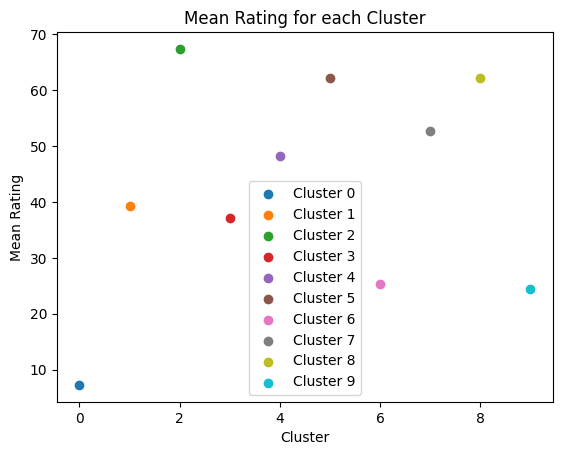

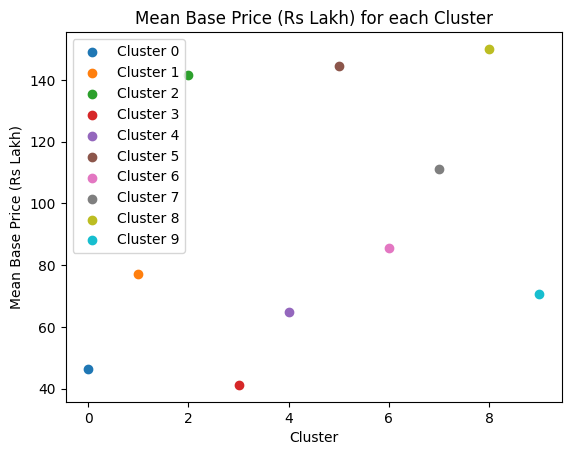

In [ ]:
import matplotlib.pyplot as plt



feature_names = cluster_means[['Rating','Base Price (Rs Lakh)']].columns


for feature in feature_names:
    plt.figure()
    for cluster_label, row in cluster_means[['Rating','Base Price (Rs Lakh)']].iterrows():
        plt.scatter(cluster_label, row[feature], label=f'Cluster {cluster_label}')
    plt.xlabel('Cluster')
    plt.ylabel('Mean ' + str(feature))
    plt.title('Mean ' + str(feature) + ' for each Cluster')
    plt.legend()
    plt.show()

**Labeling on the basis evaluation**

In [ ]:
New_df['cluster']=New_df['cluster'].replace(2.0,'A')
New_df['cluster']=New_df['cluster'].replace(5.0,'B')
New_df['cluster']=New_df['cluster'].replace(8.0,'C')
New_df['cluster']=New_df['cluster'].replace(7.0,'D')
New_df['cluster']=New_df['cluster'].replace(4.0,'E')
New_df['cluster']=New_df['cluster'].replace(1.0,'F')
New_df['cluster']=New_df['cluster'].replace(3.0,'G')
New_df['cluster']=New_df['cluster'].replace(6.0,'H')
New_df['cluster']=New_df['cluster'].replace(9.0,'I')
New_df['cluster']=New_df['cluster'].replace(0.0,'J')

In [ ]:
import pandas as pd


df1 = New_df
df2 = df
col=df1.columns
unique_identifier ='Player'

In [ ]:
df2.columns

Index(['No', 'Name', 'SLOT', 'Age', 'ROLE', 'BATTING', 'BOWLING', 'C/U/A',
       'Test caps', 'ODI caps', 'T20 caps', 'IPL', 'T20I Runs', 'T20I HS',
       'T20I Bat avg', 'T20I Bat Strike rate', 'T20I wickets', 'T20I BBI',
       'T20I Bowl avg', 'T20I Economy', 'T20I Bowl Strike rate', 'IPL Runs',
       'IPL HS', 'IPL Bat avg', 'IPLStrike rate', 'IPL wickets', 'IPL BBI',
       'IPL Bowl avg', 'IPL Bowl Economy', 'IPL Bowl Strike rate',
       'Last IPL Runs', 'Last IPL HS', 'Last IPL Bat avg',
       'Last IPLStrike rate', 'Last IPL wickets', 'Last IPL Bowl avg',
       'Last IPL Economy', 'Last IPL Bowl Strike rate', 'T20 MATCHES',
       'T20 RUNS', 'T20 HS', 'T20 BAT AVG', 'T20 BAT STRIKE RATE',
       'T20 WIKCKETS', 'T20 BOWL AVG', 'T20 ECONOMY', 'T20 BOWL STRIKE RATE',
       'captain', 'Current Form', 'popularity(%)', 'Base Price (Rs Lakh)',
       'Previous Sold Price(Rs Lakh)', 'Rating', 'price range',
       'Starting price', 'Maximum price'],
      dtype='object')

In [ ]:
df2=df2[['Name','price range',
       'Starting price', 'Maximum price']]
df2['Player']=df2['Name']

<ipython-input-529-328dede9aeec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Player']=df2['Name']


In [ ]:
df2=df2[['Player','price range',
       'Starting price', 'Maximum price']]
df2

,Player,price range,Starting price,Maximum price
0,R Ashwin,B,200.0,1200
1,Trent Boult,B,200.0,1200
2,Pat Cummins,B,200.0,1200
3,Quinton De Kock,A,200.0,1500
4,Shikhar Dhawan,A,200.0,1500
...,...,...,...,...
584,Safyaan Sharif,H,20.0,200
585,Henry Shipley,H,20.0,200
586,Maxwell Swaminathan,J,20.0,50
587,Johan Van Dyk,I,20.0,100


In [ ]:
merged_df = pd.merge(df1, df2, on=unique_identifier, how='inner')
df3=merged_df

In [ ]:
df5=df3[['ROLE','SOLD PRICE(Lakh)']]

In [ ]:
import pandas as pd


cluster_groups = df5.groupby(df5['ROLE'].values.ravel())

cluster_dataframes = []
for cluster_label, group in cluster_groups:
    cluster_dataframes.append(group)

for i, cluster_df in enumerate(cluster_dataframes):
    print(f"ROLE {i+1} DataFrame:\n", cluster_df)
    print("\n")


ROLE 1 DataFrame:
            ROLE  SOLD PRICE(Lakh)
4    ALLROUNDER               575
5    ALLROUNDER              1150
7    ALLROUNDER               650
13   ALLROUNDER               800
19   ALLROUNDER               400
23   ALLROUNDER               650
27   ALLROUNDER               900
29   ALLROUNDER               825
30   ALLROUNDER               110
31   ALLROUNDER               825
35   ALLROUNDER                20
36   ALLROUNDER                20
37   ALLROUNDER                20
38   ALLROUNDER                20
39   ALLROUNDER                20
48   ALLROUNDER               280
49   ALLROUNDER               875
50   ALLROUNDER                20
52   ALLROUNDER               110
56   ALLROUNDER                20
57   ALLROUNDER               725
59   ALLROUNDER                75
60   ALLROUNDER               875
62   ALLROUNDER               100
66   ALLROUNDER                20
67   ALLROUNDER                50
68   ALLROUNDER              1075
69   ALLROUNDER              

In [ ]:
cluster_groups = df5.groupby(df5['ROLE'].values.ravel())

Role_sum = cluster_groups.sum()
Role_sum

<ipython-input-534-42f5dc8e8676>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Role_sum = cluster_groups.sum()


,SOLD PRICE(Lakh)
ALLROUNDER,15675
BATSMAN,8205
BOWLER,10385
WICKETKEEPER,5680


**Evaluation of The player performance and player evaluation**

In [ ]:
equality_percentage = (df3['price range'] == df3['cluster']).mean() * 100

print("Equality Percentage:", equality_percentage)

Equality Percentage: 21.804511278195488


In [ ]:
df3['Difference'] = np.where((df3['SOLD PRICE(Lakh)'] >= df3['Starting price'])&(df3['SOLD PRICE(Lakh)'] <= df3['Maximum price']), 0, df3['SOLD PRICE(Lakh)']-df3['Maximum price'] )

In [ ]:
df3['Difference'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      0
1      0
2      0
3      0
4      0
      ..
128    0
129    0
130    0
131    0
132    0
Name: Difference, Length: 133, dtype: int64>

In [ ]:
df4=df3[['ROLE','Difference']]

In [ ]:
import pandas as pd


cluster_groups = df4.groupby(df4['ROLE'].values.ravel())

cluster_dataframes = []
for cluster_label, group in cluster_groups:
    cluster_dataframes.append(group)

for i, cluster_df in enumerate(cluster_dataframes):
    print(f"ROLE {i+1} DataFrame:\n", cluster_df)
    print("\n")


ROLE 1 DataFrame:
            ROLE  Difference
4    ALLROUNDER           0
5    ALLROUNDER         650
7    ALLROUNDER           0
13   ALLROUNDER           0
19   ALLROUNDER           0
23   ALLROUNDER           0
27   ALLROUNDER         100
29   ALLROUNDER         725
30   ALLROUNDER           0
31   ALLROUNDER           0
35   ALLROUNDER           0
36   ALLROUNDER           0
37   ALLROUNDER           0
38   ALLROUNDER           0
39   ALLROUNDER           0
48   ALLROUNDER          80
49   ALLROUNDER           0
50   ALLROUNDER           0
52   ALLROUNDER           0
56   ALLROUNDER           0
57   ALLROUNDER           0
59   ALLROUNDER           0
60   ALLROUNDER           0
62   ALLROUNDER           0
66   ALLROUNDER           0
67   ALLROUNDER           0
68   ALLROUNDER           0
69   ALLROUNDER           0
71   ALLROUNDER           0
72   ALLROUNDER         575
73   ALLROUNDER           0
74   ALLROUNDER           0
75   ALLROUNDER           0
76   ALLROUNDER           0
8

In [ ]:
cluster_groups = df4.groupby(df4['ROLE'].values.ravel())

Role_group = cluster_groups.sum()
Role_group

<ipython-input-540-c4872c3d558d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Role_group = cluster_groups.sum()


,Difference
ALLROUNDER,2130
BATSMAN,80
BOWLER,420
WICKETKEEPER,25


**Mean Difference(%)**

In [ ]:
Mean_df = pd.concat([Role_group, Role_sum], axis=1)
Mean_df['Mean Difference(%)']=(Mean_df['Difference']/Mean_df['SOLD PRICE(Lakh)'])*100
Mean_df
from tabulate import tabulate

headers = ['Difference', 'SOLD PRICE(Lakh)', 'Mean Difference(%)']

# 'fancy_grid' format
print(tabulate(Mean_df, headers=headers, tablefmt='fancy_grid'))
print()


╒══════════════╤══════════════╤════════════════════╤══════════════════════╕
│              │   Difference │   SOLD PRICE(Lakh) │   Mean Difference(%) │
╞══════════════╪══════════════╪════════════════════╪══════════════════════╡
│ ALLROUNDER   │         2130 │              15675 │            13.5885   │
├──────────────┼──────────────┼────────────────────┼──────────────────────┤
│ BATSMAN      │           80 │               8205 │             0.975015 │
├──────────────┼──────────────┼────────────────────┼──────────────────────┤
│ BOWLER       │          420 │              10385 │             4.04429  │
├──────────────┼──────────────┼────────────────────┼──────────────────────┤
│ WICKETKEEPER │           25 │               5680 │             0.440141 │
╘══════════════╧══════════════╧════════════════════╧══════════════════════╛



In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from IPython.display import display, HTML

data=df
unique_values = data['ROLE'].unique().tolist()
unique_values_1 = data['BATTING'].unique().tolist()
unique_values_2 = data['BOWLING'].unique().tolist()
unique_values_3 = data['SLOT'].unique().tolist()
text_box = widgets.Text(description='Budget:')
dropdown_a = widgets.Dropdown(options=unique_values, description='ROLE:')
dropdown_b = widgets.Dropdown(options=unique_values_1, description='BATTING:')
dropdown_c = widgets.Dropdown(options=unique_values_2, description='BOWLING:')
dropdown_d = widgets.Dropdown(options=unique_values_3, description='SLOT:')


button = widgets.Button(description='Search')


def handle_button_click(button):
    max_price = int(text_box.value)
    option_a = dropdown_a.value
    option_b = dropdown_b.value
    option_c = dropdown_c.value
    option_d = dropdown_d.value
    filtered_data = data[(data['Maximum price'] <= max_price) & (data['ROLE'] == option_a) & (data['BOWLING'] == option_c) & (data['BATTING'] == option_b) & (data['SLOT'] == option_d)]
    sorted_data = filtered_data.sort_values('Rating', ascending=False)



    top_five = sorted_data[['Name', 'SLOT', 'Age', 'ROLE', 'BATTING', 'BOWLING','Base Price (Rs Lakh)','Maximum price']].head(5)
    display(HTML(top_five.to_html(index=False)))

button.on_click(handle_button_click)


display(text_box)
display(dropdown_a)
display(dropdown_b)
display(dropdown_c)
display(dropdown_d)

display(button)


Text(value='', description='Budget:')

Dropdown(description='ROLE:', options=('ALLROUNDER', 'BOWLER', 'WICKETKEEPER', 'BATSMAN'), value='ALLROUNDER')

Dropdown(description='BATTING:', options=('RHB', 'LHB'), value='RHB')

Dropdown(description='BOWLING:', options=('RIGHT ARM Off Spin', 'LEFT ARM Fast Medium', 'RIGHT ARM Fast', 'NOT…

Dropdown(description='SLOT:', options=('INDIAN', 'FOREIGNER'), value='INDIAN')

Button(description='Search', style=ButtonStyle())